### 영상 특징 검출

#### 필요한 라이브러리 임포트

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets 
import IPython.display as display
from ipywidgets import Layout, Button, Box, Layout, Image, IntSlider, AppLayout

#### 데이터 생성

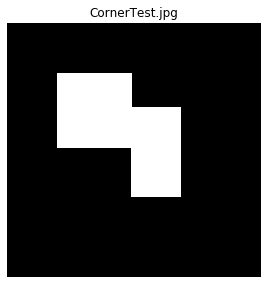

True

In [2]:
def plot(img):
    plt.axis('off')
    plt.imshow(img)
    plt.show()
    
img = np.zeros((512,512,3),dtype=np.int32)

pt1 = 100,100
pt2 = 250,250
cv2.rectangle(img,pt1,pt2,(255,255,255),-1)

pt3 = 250,170
pt4 = 350,350
cv2.rectangle(img,pt3,pt4,(255,255,255),-1)


plt.figure(figsize=(10,10))
imgae1=plt.subplot(1,2,1)
imgae1.set_title('CornerTest.jpg')
plt.axis('off')
plt.imshow(img, cmap="gray")

plt.show()
cv2.imwrite('./data/CornerTest.jpg',img)

#### 코너점 검출

corners.shape= (8, 2)


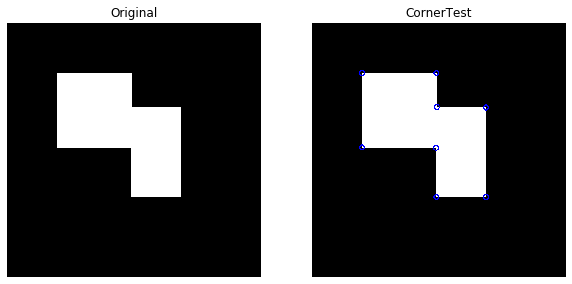

In [3]:
def findLocalMaxima(src):
    kernel = cv2.getStructuringElement(shape=cv2.MORPH_RECT,ksize=(11,11))
    dilate = cv2.dilate(src,kernel)
    localMax = (src==dilate)
    
    erode = cv2.erode(src,kernel)
    localMax2 = src>erode
    localMax &= localMax2
    points = np.argwhere(localMax == True)
    points[:,[0,1]] = points[:,[1,0]]
    return points

src = cv2.imread('./data/CornerTest.jpg')
gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
res = cv2.preCornerDetect(gray,ksize=3)
ret,res2 = cv2.threshold(np.abs(res),0.1,0,cv2.THRESH_TOZERO)

corners = findLocalMaxima(res2)
print('corners.shape=',corners.shape)

dst = src.copy()
for x,y in corners:
    cv2.circle(dst,(x,y),5,(0,0,255),2)
    
plt.figure(figsize=(10,10))

imgae1=plt.subplot(1,2,1)
imgae1.set_title('Original')
plt.axis('off')
plt.imshow(src, cmap="gray")

imgae2=plt.subplot(1,2,2)
imgae2.set_title('CornerTest')
plt.axis('off')
plt.imshow(dst, cmap="gray")

plt.show()

#### 코너점 검출:conerEigenValsAndVecs

res.shape= (512, 512, 6)
len(corners=) 8


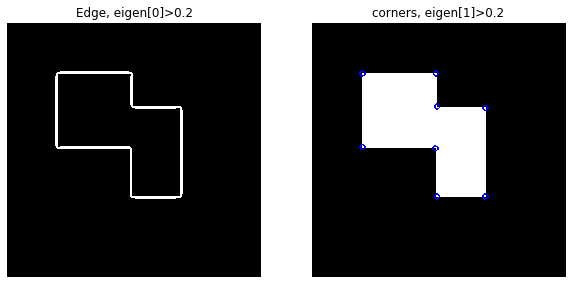

In [4]:
src = cv2.imread('./data/CornerTest.jpg')
gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)

res = cv2.cornerEigenValsAndVecs(gray,blockSize=5,ksize=3)
print('res.shape=',res.shape)
eigen = cv2.split(res)

T = 0.2
ret,edge = cv2.threshold(eigen[0],T,255,cv2.THRESH_BINARY)
edge = edge.astype(np.uint8)

corners = np.argwhere(eigen[1]>T)
corners[:,[0,1]] = corners[:,[1,0]]
print('len(corners=)',len(corners))

dst = src.copy()
for x,y in corners:
    cv2.circle(dst,(x,y),5,(0,0,255),2)
    
plt.figure(figsize=(10,10))

imgae1=plt.subplot(1,2,1)
imgae1.set_title('Edge, eigen[0]>0.2')
plt.axis('off')
plt.imshow(edge, cmap="gray")

imgae2=plt.subplot(1,2,2)
imgae2.set_title('corners, eigen[1]>0.2')
plt.axis('off')
plt.imshow(dst, cmap="gray")

plt.show()

#### 코너점 검출 1: cv2.cornerMinEigenVal()

eigen.shape= (512, 512)
len(corners)= 8


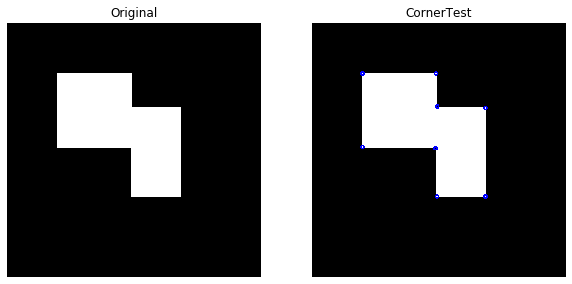

In [5]:
src = cv2.imread('./data/CornerTest.jpg')
gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)

eigen = cv2.cornerMinEigenVal(gray,blockSize=5)
print('eigen.shape=',eigen.shape)

T = 0.2
corners = np.argwhere(eigen > T)
corners[:,[0,1]] = corners[:,[1,0]]
print('len(corners)=',len(corners))
dst = src.copy()

for x,y, in corners:
    cv2.circle(dst,(x,y),3,(0,0,255),2)
    
plt.figure(figsize=(10,10))

imgae1=plt.subplot(1,2,1)
imgae1.set_title('Original')
plt.axis('off')
plt.imshow(src, cmap="gray")

imgae2=plt.subplot(1,2,2)
imgae2.set_title('CornerTest')
plt.axis('off')
plt.imshow(dst, cmap="gray")

plt.show()

#### 코너점 검출 2: cv2.cornerHarris(), cv2.cornerSubPix()

corners= [[101 101]
 [249 101]
 [252 168]
 [349 171]
 [101 249]
 [248 252]
 [251 349]
 [349 349]]
corners2 [[ 99.5594   99.5577 ]
 [250.44127  99.5592 ]
 [250.5585  169.43939]
 [350.43945 169.56058]
 [ 99.55908 250.43958]
 [249.43884 250.55685]
 [249.56104 350.4409 ]
 [350.44144 350.44037]]


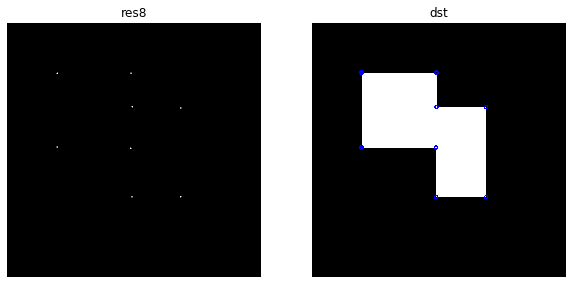

In [6]:
src = cv2.imread('./data/CornerTest.jpg')
gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
res = cv2.cornerHarris(gray,blockSize=5,ksize=3,k=0.01)
ret,res = cv2.threshold(np.abs(res),0.02,0,cv2.THRESH_TOZERO)

res8 = cv2.normalize(res,None,0,255,cv2.NORM_MINMAX,dtype=cv2.CV_8U)

corners = findLocalMaxima(res)
print('corners=',corners)

corners = corners.astype(np.float32,order='C')
term_crit = (cv2.TERM_CRITERIA_MAX_ITER+cv2.TERM_CRITERIA_EPS,10,0.01)
corners2 = cv2.cornerSubPix(gray,corners,(5,5),(-1,-1),term_crit)
print('corners2',corners2)

dst = src.copy()
for x,y in corners2:
    cv2.circle(dst,(x,y),3,(0,0,255),2)
    
plt.figure(figsize=(10,10))

imgae1=plt.subplot(1,2,1)
imgae1.set_title('res8')
plt.axis('off')
plt.imshow(res8, cmap="gray")

imgae2=plt.subplot(1,2,2)
imgae2.set_title('dst')
plt.axis('off')
plt.imshow(dst, cmap="gray")

plt.show()

#### 코너점 검출: cv2.goodFeaturesToTrack()

corners.shape= (5, 1, 2)
corners= [[[350. 350.]]

 [[250. 350.]]

 [[249. 251.]]

 [[100. 100.]]

 [[100. 250.]]]
corners2.shape= (8, 1, 2)
corners2= [[[350. 350.]]

 [[250. 350.]]

 [[249. 251.]]

 [[100. 100.]]

 [[100. 250.]]

 [[350. 170.]]

 [[250. 100.]]

 [[251. 169.]]]


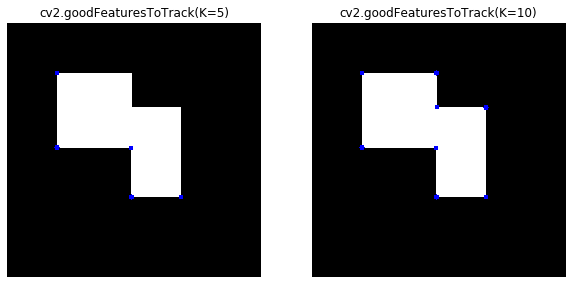

In [7]:
src = cv2.imread('./data/CornerTest.jpg')
gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)

K=5
corners = cv2.goodFeaturesToTrack(gray,maxCorners=K,qualityLevel=0.05,minDistance=10)
print('corners.shape=',corners.shape)
print('corners=',corners)

K=10
corners2 = cv2.goodFeaturesToTrack(gray,maxCorners=K,qualityLevel=0.05,minDistance=10)
print('corners2.shape=',corners2.shape)
print('corners2=',corners2)

dst = src.copy()
dst2 = src.copy()

corners = corners.reshape(-1,2)
for x,y in corners:
    cv2.circle(dst,(x,y),5,(0,0,255),-1)
    
corners2 = corners2.reshape(-1,2)
for x,y in corners2:
    cv2.circle(dst2,(x,y),5,(0,0,255),-1)


plt.figure(figsize=(10,10))

imgae1=plt.subplot(1,2,1)
imgae1.set_title('cv2.goodFeaturesToTrack(K=5)')
plt.axis('off')
plt.imshow(dst, cmap="gray")

imgae2=plt.subplot(1,2,2)
imgae2.set_title('cv2.goodFeaturesToTrack(K=10)')
plt.axis('off')
plt.imshow(dst2, cmap="gray")

plt.show()

### 체스보드 패턴 코너점 검출

True
corners.shape= (42, 1, 2)


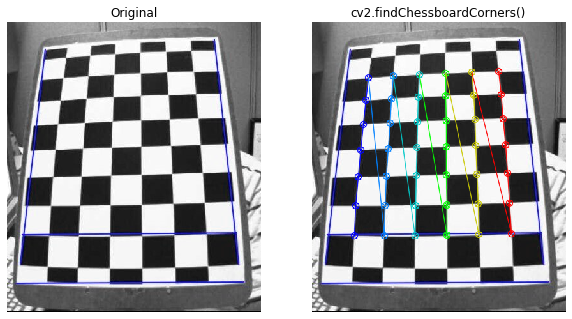

In [8]:
src = cv2.imread('./data/chessBoard.jpg')
gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
patternSize = (7,6)
found,corners = cv2.findChessboardCorners(src,patternSize)
print(found)
print('corners.shape=',corners.shape)

term_crit = (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,10,0.01)
corners2 = cv2.cornerSubPix(gray,corners,(5,5),(-1,-1),term_crit)

dst = src.copy()
cv2.drawChessboardCorners(dst,patternSize,corners2,found)

plt.figure(figsize=(10,10))

imgae1=plt.subplot(1,2,1)
imgae1.set_title('Original')
plt.axis('off')
plt.imshow(src)

imgae2=plt.subplot(1,2,2)
imgae2.set_title('cv2.findChessboardCorners()')
plt.axis('off')
plt.imshow(dst)

plt.show()

#### 데이터 생성

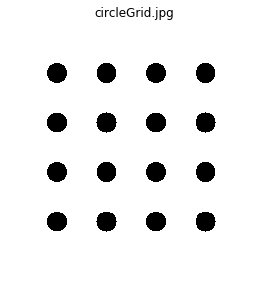

True

In [9]:
def plot(img):
    plt.axis('off')
    plt.imshow(img)
    plt.show()
    
img = np.zeros((512,512,3),dtype=np.int32)+255


for i in range(1,5):
    for j in range(1,5):
        pt1 = i*100
        pt2 = j*100
        cv2.circle(img,(pt1,pt2),20,(0,0,0),-1)


plt.figure(figsize=(10,10))
imgae1=plt.subplot(1,2,1)
imgae1.set_title('circleGrid.jpg')
plt.axis('off')
plt.imshow(img, cmap="gray")

plt.show()
cv2.imwrite('./data/circleGrid.jpg',img)

#### 원 패턴 중심점 검출

centers.shape= (16, 1, 2)


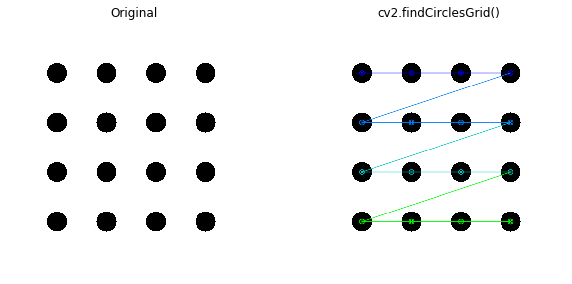

In [10]:
src = cv2.imread('./data/circleGrid.jpg')
gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
patternSize = (4,4)
found,centers = cv2.findCirclesGrid(src,patternSize)
print('centers.shape=',centers.shape)

term_crit = (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,10,0.01)
centers2 = cv2.cornerSubPix(gray,centers,(5,5),(-1,-1),term_crit)

dst = src.copy()
cv2.drawChessboardCorners(dst,patternSize,centers2,found)

plt.figure(figsize=(10,10))

imgae1=plt.subplot(1,2,1)
imgae1.set_title('Original')
plt.axis('off')
plt.imshow(src)

imgae2=plt.subplot(1,2,2)
imgae2.set_title('cv2.findCirclesGrid()')
plt.axis('off')
plt.imshow(dst)

plt.show()

### 모멘트

m00=41001.0
m10=9454225.0
m01=8726225.0
m20=2397368875.0
m11=2119946125.0
m02=2023688875.0
m30=651249446875.0
m21=560532817875.0
m12=514587165875.0
m03=504399486875.0
mu20=217364232.4150629
mu11=107807529.58464432
mu02=166490203.00114632
mu30=-1790368560.1228027
mu21=584194816.4979553
mu12=2065142657.361374
mu03=2830588638.024536
nu20=0.1293001961152179
nu11=0.06412984584958643
nu02=0.09903752636820143
nu30=-0.00525964363794542
nu21=0.0017162145372477983
nu12=0.006066859461883883
nu03=0.008315543432356281


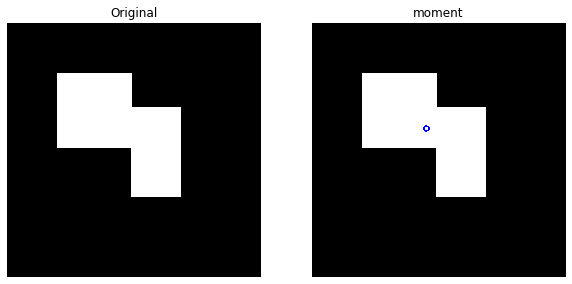

In [11]:
src = cv2.imread('./data/CornerTest.jpg')
gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
ret,bimage = cv2.threshold(gray,128,255,cv2.THRESH_BINARY)

M = cv2.moments(bimage,True)
for key,value in M.items():
    print('{}={}'.format(key,value))
    
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
dst = src.copy()
cv2.circle(dst,(cx,cy),5,(0,0,255),2)

plt.figure(figsize=(10,10))

imgae1=plt.subplot(1,2,1)
imgae1.set_title('Original')
plt.axis('off')
plt.imshow(src)

imgae2=plt.subplot(1,2,2)
imgae2.set_title('moment')
plt.axis('off')
plt.imshow(dst)

plt.show()

#### 경계선 모멘트

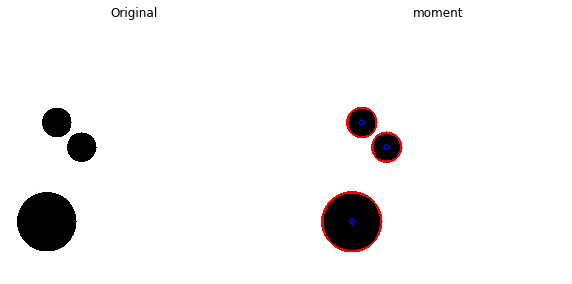

In [12]:
src = cv2.imread('./data/circle2.jpg')
gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
ret,bimage = cv2.threshold(gray,128,255,cv2.THRESH_BINARY_INV)

mode = cv2.RETR_EXTERNAL
method = cv2.CHAIN_APPROX_SIMPLE
contours,hierarchy = cv2.findContours(bimage,mode,method)

dst = src.copy()
cv2.drawContours(dst,contours,-1,(255,0,0),3)

for cnt in contours:
    M = cv2.moments(cnt,True)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    cv2.circle(dst,(cx,cy),5,(0,0,255),2)
    
plt.figure(figsize=(10,10))

imgae1=plt.subplot(1,2,1)
imgae1.set_title('Original')
plt.axis('off')
plt.imshow(src)

imgae2=plt.subplot(1,2,2)
imgae2.set_title('moment')
plt.axis('off')
plt.imshow(dst)

plt.show()

#### Hu의 불변 모먼트

hu.shape= (7, 1)
hu= [[ 2.29512832e-01]
 [ 1.77264199e-02]
 [ 5.73565197e-04]
 [ 1.05422872e-04]
 [ 9.93149152e-09]
 [-7.94530682e-07]
 [-2.39456345e-08]]
A= [[ 1.41421356e-01  1.41421356e-01  1.87491761e+02]
 [-1.41421356e-01  1.41421356e-01  2.44545584e+02]]
hu2.shape= (7, 1)
hu2= [[ 2.29512832e-01]
 [ 1.77264199e-02]
 [ 5.73565197e-04]
 [ 1.05422872e-04]
 [ 9.93149152e-09]
 [-7.94530682e-07]
 [-2.39456345e-08]]
diffSum= 0.0


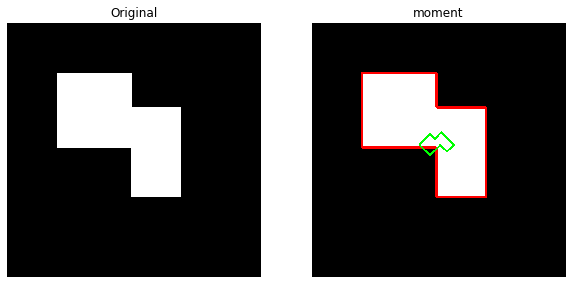

In [13]:
src = cv2.imread('./data/CornerTest.jpg')
gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
ret,bimage = cv2.threshold(gray,128,255,cv2.THRESH_BINARY)

mode = cv2.RETR_EXTERNAL
method = cv2.CHAIN_APPROX_SIMPLE
contours,hierarchy = cv2.findContours(bimage,mode,method)

dst = src.copy()
cnt = contours[0]
cv2.drawContours(dst,[cnt],0,(255,0,0),3)

M = cv2.moments(cnt)
hu = cv2.HuMoments(M)
print('hu.shape=',hu.shape)
print('hu=',hu)

angle = 45.0
scale = 0.2
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
center = (cx,cy)
t = (20,30)
A = cv2.getRotationMatrix2D(center,angle,scale)
A[:,2] +=t
print('A=',A)
cnt2 = cv2.transform(cnt,A)
cv2.drawContours(dst,[cnt2],0,(0,255,0),3)

M2 = cv2.moments(cnt)
hu2 = cv2.HuMoments(M2)
print('hu2.shape=',hu2.shape)
print('hu2=',hu2)

diffSum = np.sum(cv2.absdiff(hu,hu2))
print('diffSum=',diffSum)

plt.figure(figsize=(10,10))

imgae1=plt.subplot(1,2,1)
imgae1.set_title('Original')
plt.axis('off')
plt.imshow(src)

imgae2=plt.subplot(1,2,2)
imgae2.set_title('moment')
plt.axis('off')
plt.imshow(dst)

plt.show()

### 모양 관련 특징 검출

len(contorus)= 7
maxLength= 2042.1677330732346
area= 48305.5
box= [[265 647]
 [ 76 496]
 [447  32]
 [636 183]]


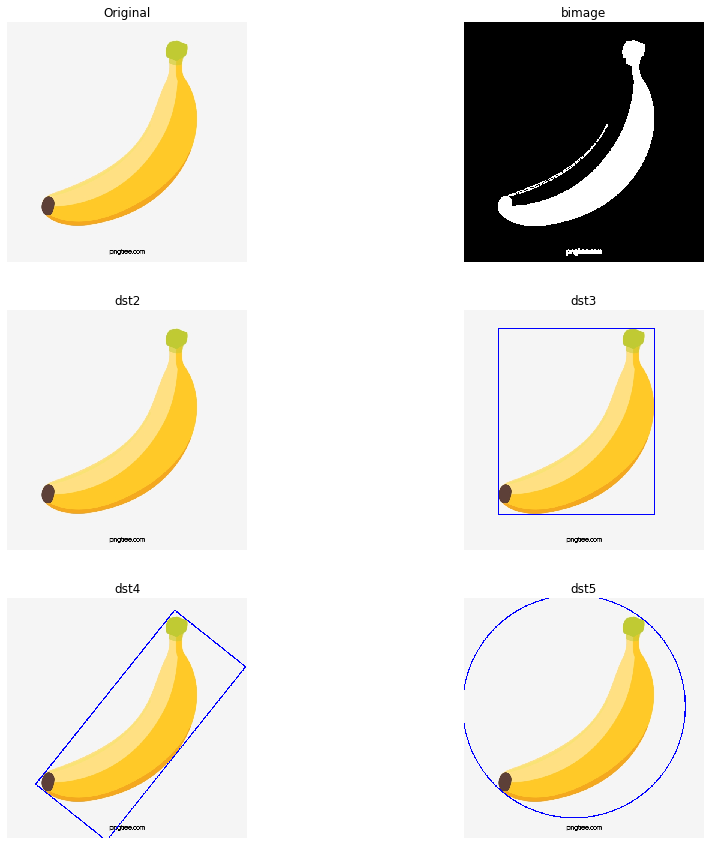

In [14]:
src = cv2.imread('./data/banana.jpg')
gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
src = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)
ret,bimage = cv2.threshold(gray,220,255,cv2.THRESH_BINARY_INV)
bimage = cv2.dilate(bimage,None)

mode = cv2.RETR_EXTERNAL
method = cv2.CHAIN_APPROX_SIMPLE
contours,hierarchy = cv2.findContours(bimage,mode,method)
print('len(contorus)=',len(contours))

maxLength=0
k=0
for i,cnt in enumerate(contours):
    perimeter = cv2.arcLength(cnt,closed=True)
    if perimeter > maxLength:
        maxLength = perimeter
        k=i
print('maxLength=',maxLength)
cnt = contours[k]
dst2 = src.copy()

area = cv2.contourArea(cnt)
print('area=',area)
x,y,width,height = cv2.boundingRect(cnt)
dst3 = dst2.copy()
cv2.rectangle(dst3,(x,y),(x+width,y+height),(0,0,255),2)

rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int32(box)
print('box=',box)
dst4 = dst2.copy()
cv2.drawContours(dst4,[box],0,(0,0,255),2)

(x,y),radius = cv2.minEnclosingCircle(cnt)
dst5 = dst2.copy()
cv2.circle(dst5,(int(x),int(y)),int(radius),(0,0,255),2)

plt.figure(figsize=(15,15))

imgae1=plt.subplot(3,2,1)
imgae1.set_title('Original')
plt.axis('off')
plt.imshow(src)

imgae2=plt.subplot(3,2,2)
imgae2.set_title('bimage')
plt.axis('off')
plt.imshow(bimage, cmap="gray")

imgae2=plt.subplot(3,2,3)
imgae2.set_title('dst2')
plt.axis('off')
plt.imshow(dst2)

imgae3=plt.subplot(3,2,4)
imgae3.set_title('dst3')
plt.axis('off')
plt.imshow(dst3)

imgae4=plt.subplot(3,2,5)
imgae4.set_title('dst4')
plt.axis('off')
plt.imshow(dst4)

imgae5=plt.subplot(3,2,6)
imgae5.set_title('dst5')
plt.axis('off')
plt.imshow(dst5)

plt.show()

#### 직선, 다각형, 타원 근사 및 내부 점 확인

maxLength= 2042.1677330732346


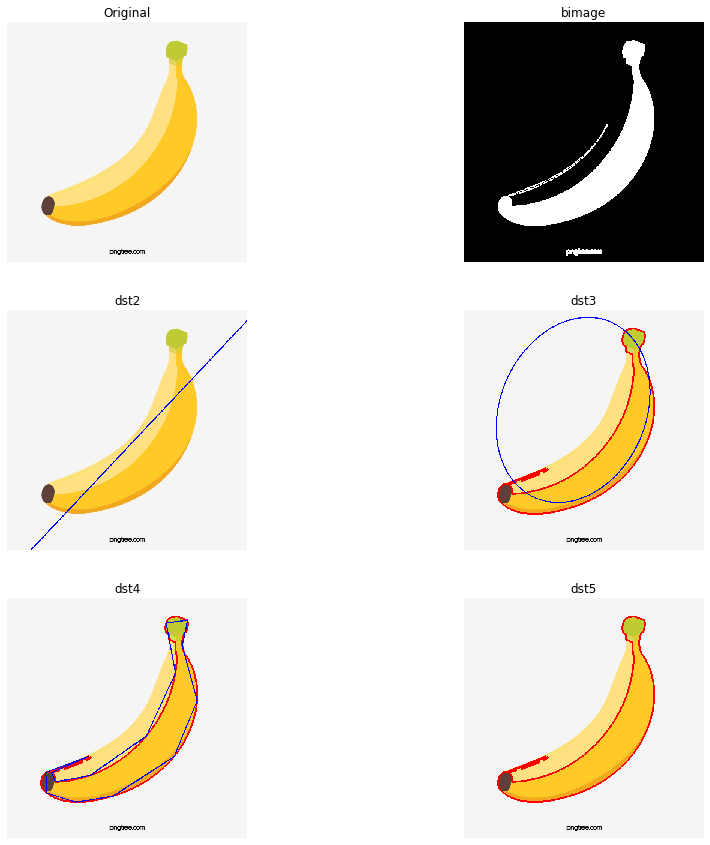

In [15]:
src = cv2.imread('./data/banana.jpg')
gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
src = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)
ret,bimage = cv2.threshold(gray,220,255,cv2.THRESH_BINARY_INV)
bimage = cv2.dilate(bimage,None)

mode = cv2.RETR_EXTERNAL
method = cv2.CHAIN_APPROX_SIMPLE
contours,hierarchy = cv2.findContours(bimage,mode,method)

maxLength=0
k=0
for i,cnt in enumerate(contours):
    perimeter = cv2.arcLength(cnt,closed=True)
    if perimeter > maxLength:
        maxLength = perimeter
        k=i
print('maxLength=',maxLength)
cnt = contours[k]

dst = src.copy()
cv2.drawContours(dst,[cnt],0,(255,0,0),3)

dst2 = src.copy()
rows,cols = dst2.shape[:2]
[vx,vy,x,y] = cv2.fitLine(cnt,cv2.DIST_L2,0,0.01,0.01)
y1 = int((-x*vy/vx)+y)
y2 = int((((cols-x)*vy)/vx)+y)
cv2.line(dst2,(0,y1),(cols-1,y2),(0,0,255),2)

ellipse = cv2.fitEllipse(cnt)
dst3 = dst.copy()
cv2.ellipse(dst3,ellipse,(0,0,255),2)

poly = cv2.approxPolyDP(cnt,epsilon=20,closed=True)
dst4 = dst.copy()
cv2.drawContours(dst4,[poly],0,(0,0,255),2)

dst5 = dst.copy()
for y in range(rows):
    for x in range(cols):
        if cv2.pointPolygonTest(cnt,(x,y),False)>0:
            dst[y,x] = (0,255,0)
            
plt.figure(figsize=(15,15))

imgae1=plt.subplot(3,2,1)
imgae1.set_title('Original')
plt.axis('off')
plt.imshow(src)

imgae2=plt.subplot(3,2,2)
imgae2.set_title('bimage')
plt.axis('off')
plt.imshow(bimage, cmap="gray")

imgae2=plt.subplot(3,2,3)
imgae2.set_title('dst2')
plt.axis('off')
plt.imshow(dst2)

imgae3=plt.subplot(3,2,4)
imgae3.set_title('dst3')
plt.axis('off')
plt.imshow(dst3)

imgae4=plt.subplot(3,2,5)
imgae4.set_title('dst4')
plt.axis('off')
plt.imshow(dst4)

imgae5=plt.subplot(3,2,6)
imgae5.set_title('dst5')
plt.axis('off')
plt.imshow(dst5)

plt.show()

#### 블록 껍질

maxLength= 900.70057117939
defects.shape= [[[  198   239   226 11411]]

 [[  240   242   241   114]]

 [[  242   275   263 13582]]

 [[    0    25     7 11551]]

 [[   26    65    43 10203]]

 [[   65    67    66   162]]

 [[   68    70    69   226]]

 [[   70    78    75   290]]

 [[   78    88    85   261]]

 [[   88   130   123  2135]]

 [[  131   197   144  5143]]]


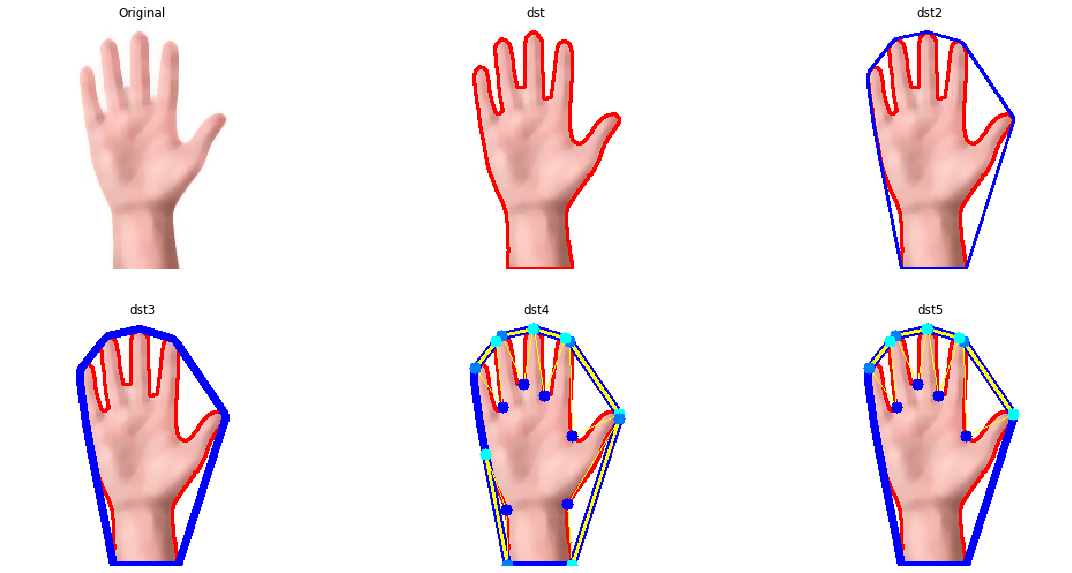

In [64]:
src = cv2.imread('./data/hand.jpg')
src = cv2.medianBlur(src,ksize=11)
hsv = cv2.cvtColor(src,cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(hsv)
v2 = cv2.equalizeHist(v)
hsv = cv2.merge([h,s,v2])
src = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)

lowerb = (0,40,0)
upperb = (20,180,255)
bimage = cv2.inRange(hsv,lowerb,upperb)

mode = cv2.RETR_EXTERNAL
method = cv2.CHAIN_APPROX_SIMPLE
contours,hierachy = cv2.findContours(bimage,mode,method)

dst = src.copy()
maxLength=0
k=0
for i,cnt in enumerate(contours):
    perimeter = cv2.arcLength(cnt,closed=True)
    if perimeter > maxLength:
        maxLength = perimeter
        k=i
print('maxLength=',maxLength)
cnt = contours[k]
cv2.drawContours(dst,[cnt],0,(255,0,0),2)

dst2 = dst.copy()
rows,cols = dst2.shape[:2]
hull = cv2.convexHull(cnt)
cv2.drawContours(dst2,[hull],0,(0,0,255),2)


dst3 = dst.copy()
hull = cv2.convexHull(cnt,returnPoints=False)
hull_points = cnt[hull[:,0]]
cv2.drawContours(dst3,[hull_points],0,(0,0,255),6)

T= 10
T2 = 50

dst4 = dst3.copy()
dst5 = dst3.copy()

defects = cv2.convexityDefects(cnt,hull)
print('defects.shape=',defects)

for i in range(defects.shape[0]):
    s,e,f,d = defects[i,0]
    dist = d/128
    start = tuple(cnt[s][0])
    end = tuple(cnt[e][0])
    far = tuple(cnt[f][0])
    
    if dist> T2:
        cv2.line(dst5,start,end,[255,255,0],2)
        cv2.line(dst5,start,far,[255,255,0],1)
        cv2.line(dst5,end,far,[255,255,0],1)
        
        cv2.circle(dst5,start,5,[0,255,255],-1)
        cv2.circle(dst5,end,5,[0,128,255],-1)
        cv2.circle(dst5,far,5,[0,0,255],-1)
    
    if dist>T:
        cv2.line(dst4,start,end,[255,255,0],2)
        cv2.line(dst4,start,far,[255,255,0],1)
        cv2.line(dst4,end,far,[255,255,0],1)
        
        cv2.circle(dst4,start,5,[0,255,255],-1)
        cv2.circle(dst4,end,5,[0,128,255],-1)
        cv2.circle(dst4,far,5,[0,0,255],-1)

plt.figure(figsize=(20,10))

imgae1=plt.subplot(2,3,1)
imgae1.set_title('Original')
plt.axis('off')
plt.imshow(src)

imgae2=plt.subplot(2,3,2)
imgae2.set_title('dst')
plt.axis('off')
plt.imshow(dst)

imgae3=plt.subplot(2,3,3)
imgae3.set_title('dst2')
plt.axis('off')
plt.imshow(dst2)

imgae4=plt.subplot(2,3,4)
imgae4.set_title('dst3')
plt.axis('off')
plt.imshow(dst3)

imgae5=plt.subplot(2,3,5)
imgae5.set_title('dst4')
plt.axis('off')
plt.imshow(dst4)

imgae6=plt.subplot(2,3,6)
imgae6.set_title('dst5')
plt.axis('off')
plt.imshow(dst5)

plt.show()

#### cv2.convexityDefects() 블록 결합

maxLength= 1102.1808005571365


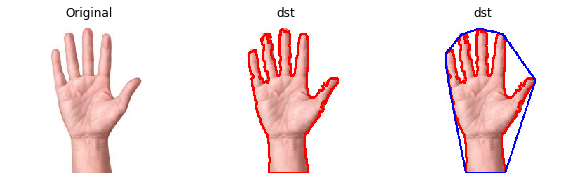

In [17]:
src = cv2.imread('./data/hand.jpg')
hsv = cv2.cvtColor(src,cv2.COLOR_BGR2HSV)
src = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)
lowerb = (0,40,0)
upperb = (20,180,255)
bimage = cv2.inRange(hsv,lowerb,upperb)

mode = cv2.RETR_EXTERNAL
method = cv2.CHAIN_APPROX_SIMPLE
contours,hierachy = cv2.findContours(bimage,mode,method)

dst = src.copy()
maxLength=0
k=0
for i,cnt in enumerate(contours):
    perimeter = cv2.arcLength(cnt,closed=True)
    if perimeter > maxLength:
        maxLength = perimeter
        k=i
print('maxLength=',maxLength)
cnt = contours[k]
cv2.drawContours(dst,[cnt],0,(255,0,0),2)

dst2 = dst.copy()
rows,cols = dst2.shape[:2]
hull = cv2.convexHull(cnt)
cv2.drawContours(dst2,[hull],0,(0,0,255),2)

plt.figure(figsize=(10,10))

imgae1=plt.subplot(1,3,1)
imgae1.set_title('Original')
plt.axis('off')
plt.imshow(src)

imgae2=plt.subplot(1,3,2)
imgae2.set_title('dst')
plt.axis('off')
plt.imshow(dst)

imgae3=plt.subplot(1,3,3)
imgae3.set_title('dst')
plt.axis('off')
plt.imshow(dst2)

plt.show()

### 모양 매칭

#### 데이터 생성

In [67]:
def plot(img):
    plt.axis('off')
    plt.imshow(img)
    plt.show()
    
img = np.zeros((512,512,3),dtype=np.int32)+255

pt_array = []

for i in range(1,4):
    for j in range(1,4):
        pt1 = i*150
        pt2 = j*150
        pt_array.append((pt1,pt2))

print(pt_array)

'''
for i in range(len(pt_array)):
    cv2.rectangle(img,pt_array[0][i],pt_array[1][i],(0,0,0),-1)
    cv2.rectangle(img,pt_array[][i],pt_array[1][i],(0,0,0),-1)

plt.figure(figsize=(10,10))
imgae1=plt.subplot(1,2,1)
imgae1.set_title('circleGrid.jpg')
plt.axis('off')
plt.imshow(img, cmap="gray")

plt.show()
cv2.imwrite('./data/refShapes.jpg',img)

'''




[(150, 150), (150, 300), (150, 450), (300, 150), (300, 300), (300, 450), (450, 150), (450, 300), (450, 450)]


'\nfor i in range(len(pt_array)):\n    cv2.rectangle(img,pt_array[0][i],pt_array[1][i],(0,0,0),-1)\n    cv2.rectangle(img,pt_array[][i],pt_array[1][i],(0,0,0),-1)\n\nplt.figure(figsize=(10,10))\nimgae1=plt.subplot(1,2,1)\nimgae1.set_title(\'circleGrid.jpg\')\nplt.axis(\'off\')\nplt.imshow(img, cmap="gray")\n\nplt.show()\ncv2.imwrite(\'./data/refShapes.jpg\',img)\n\n'